## Regresja liniowa

In [2]:
# import subprocess

# subprocess.call("wget https://raw.githubusercontent.com/jgrynczewski/datascience_demo/main/weights_heights.csv")

# 1. Popatrzmy na dane

In [55]:
# Import potrzebnych bibliotek

import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('height_and_weight.csv', index_col='Index')
data.head(10)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
6,68.69784,123.3024
7,69.80204,141.4947
8,70.01472,136.4623
9,67.90265,112.3723


In [39]:
data.describe()

,Height,Weight
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [40]:
# Wysokość przeliczamy na metry
data["Height"] = data["Height"] * 0.0254

In [41]:
# Wagę przeliczamy na kilogramy
data["Weight"] = data["Weight"] * 0.4536

In [14]:
# Wyświetlamy jeszcze raz data
data.head(10)

,Index,Height,Weight
0,1,1.670896,51.253398
1,2,1.816486,61.910639
2,3,1.762728,69.413002
3,4,1.732702,64.563337
4,5,1.721810,65.453165
5,6,1.744925,55.929969
6,7,1.772972,64.181996
7,8,1.778374,61.899299
8,9,1.724727,50.972075
9,10,1.696272,54.734642


In [15]:
data[["Height", "Weight"]].corr()

,Height,Weight
Height,1.000000,0.502859
Weight,0.502859,1.000000


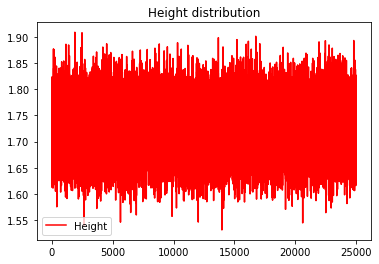

In [16]:
data.plot(y="Height", color="red", title="Height distribution")

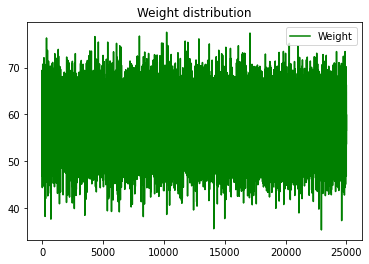

In [17]:
data.plot(y="Weight", color="green", title="Weight distribution")

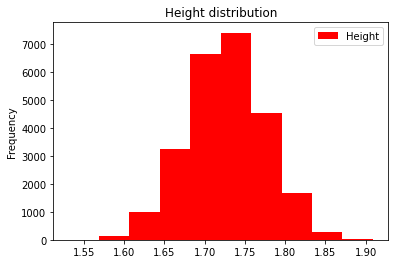

In [18]:
data.plot(y="Height", kind="hist", color="red", title="Height distribution")

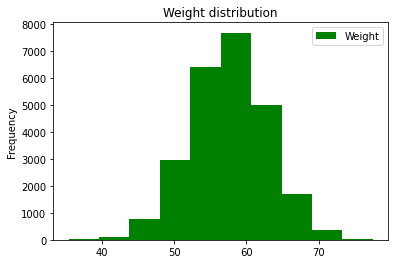

In [19]:
data.plot(y="Weight", kind='hist', color="green", title="Weight distribution")

In [26]:
def calc_bmi(height, weight):
  return weight / (height**2)

In [27]:
h = data["Height"].iloc[0]
w = data["Weight"].iloc[0]
bmi = calc_bmi(h , w)

print(h)
print(w)
print(bmi)

1.6708960739999998
51.253398000000004
18.357933248527846


In [42]:
# Tworzymy trzecią kolumnę
def generate_bmi(row):
  return row["Weight"] / (row["Height"] ** 2)

data["BMI"] = data.apply(generate_bmi, axis=1)

In [36]:
data.head(10)

,Index,Height,Weight,BMI
0,1,1.670896,51.253398,18.357933
1,2,1.816486,61.910639,18.762946
2,3,1.762728,69.413002,22.339334
3,4,1.732702,64.563337,21.504948
4,5,1.721810,65.453165,22.078014
5,6,1.744925,55.929969,18.369231
6,7,1.772972,64.181996,20.417829
7,8,1.778374,61.899299,19.572197
8,9,1.724727,50.972075,17.135289
9,10,1.696272,54.734642,19.022663


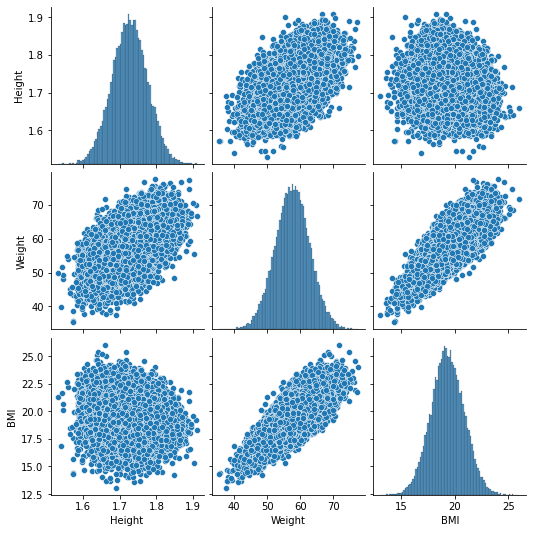

In [43]:
sns.pairplot(data)

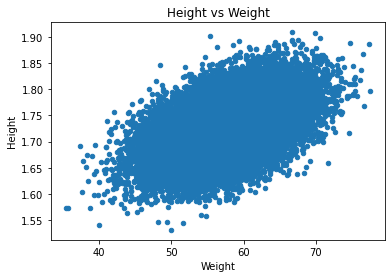

In [44]:
data.plot(y='Height', x='Weight', kind='scatter', title='Height vs Weight')

Minimalizacja funkcji błędu

In [51]:
X = np.array([(x, 1) for x in data["Weight"]])
print(X)
Y = data['Height']

def error(w, X, Y):
  err = Y - np.matmul(X, w)
  return err.dot(err)

x0 = np.array([0, 0])

result = scipy.optimize.minimize(
    error, 
    x0=x0, 
    args=(X, Y), 
    method='L-BFGS-B', 
    bounds=((-100, 100), (-10,10))
)



[[51.253398    1.        ]
 [61.91063928  1.        ]
 [69.41300184  1.        ]
 ...
 [53.6452308   1.        ]
 [59.99685552  1.        ]
 [56.6428464   1.        ]]


In [52]:
w1, w0 = result.x
print(w1)
print(w0)

0.004591514907793187
1.462355351557116


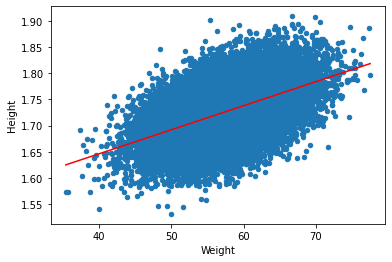

In [56]:
x = np.linspace(min(data['Weight']), max(data['Weight']), 100)
y = w0 + x * w1

data.plot(
    y='Height',
    x='Weight',
    kind='scatter'
)

plt.plot(x, y, '-r')
plt.show()

In [57]:
# Przewidywanie

x = 80
y = w0 + x*w1
print(y)

1.829676544180571
